<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/deeplearning.ai/tf/c4_w1_time_series_baselines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series & Prediction Baselines

The next code will set up the time series with seasonality, trend and a bit of noise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [2]:
def plot_series(times, series, format='-', start=0, end=None):
  # plt.figure(figsize=(10, 6))
  plt.plot(times[start:end], series[start:end], format)
  plt.xlabel('time')
  plt.ylabel('value')
  plt.grid(True)

def trend(time, slope=0):
  return slope * time

def seasonal_patten(season_time):
  '''
  Just an arbitrary pattern, you can change it if you wish
  '''
  return np.where(season_time < 0.4,
                  np.cos(season_time * 2 * np.pi),
                  1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
  '''
  Repeats the same patten at each period
  '''
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_patten(season_time)


def noise(time, noise_level=1, rnd=np.random.RandomState(42)):
  return rnd.randn(len(time)) * noise_level

In [3]:
time = np.arange(4 * 365 + 1, dtype='float32')
baseline = 10
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5
rnd_seed = np.random.RandomState(42)
trend_series = trend(time, slope)
seasonality_series = seasonality(time, period=365, amplitude=amplitude)

series = baseline + trend_series + seasonality_series
series += noise(time, noise_level, rnd=rnd_seed)

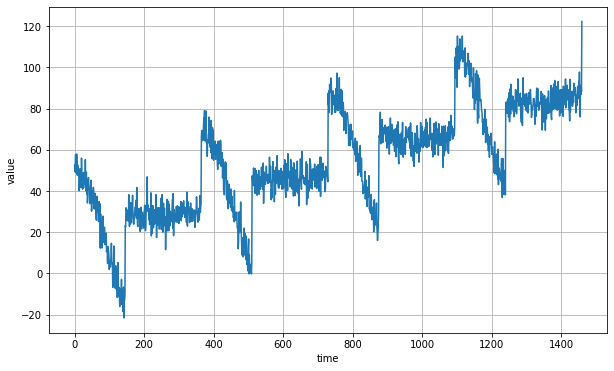

In [4]:
plt.figure(figsize=(10, 6));
plot_series(time, series);

Now that we have the time series, let's split it so we can start forecasting

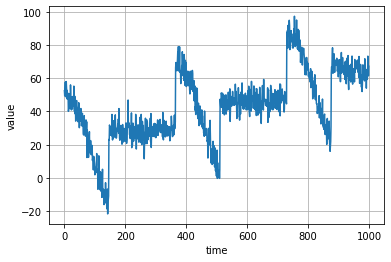

In [5]:
split_time = 1000

time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

plt.plot(time_train, x_train);
plt.xlabel('time');
plt.ylabel('value');
plt.grid(True);

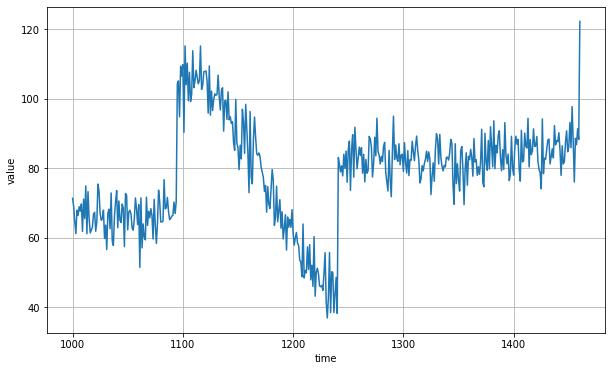

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(time_valid, x_valid);
plt.xlabel('time');
plt.ylabel('value');
plt.grid(True);

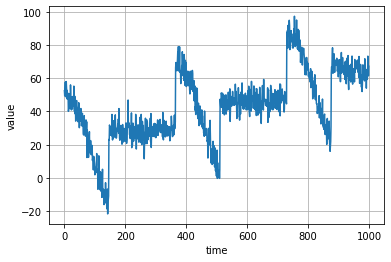

In [7]:
plot_series(time_train, x_train)

## Naive Forecast

In [8]:
naive_forecast = series[split_time - 1: -1]

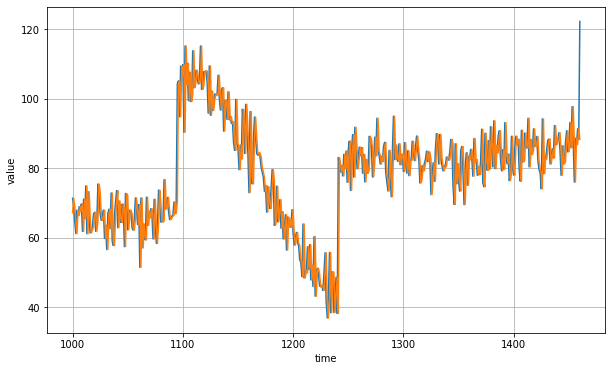

In [11]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)